# Data Wrangling

In [30]:
import matplotlib.pyplot as plt
import nltk
import pymongo
import pandas as pd
import re

from pymongo import MongoClient
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [178]:
client = pymongo.MongoClient("mongodb+srv://dbUser:<password>@cluster0.vbnow.mongodb.net/hackathon_santander?retryWrites=true&w=majority")
db = client.hackathon_santander

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/whrocha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###  Filtros
- Somente tweets marcados como pt pelo Twitter.
- Retirado do texto a palavra RT para nao atrapalhar na visualizaçao do word cloud

In [172]:
def filter_entries(entries, stopwords):

    text_entries = entries
    regex_str = '[^a-zA-Z\u00C0-\u00FF 0-9]+'
    subbed_entries = re.sub(regex_str, ' ', text_entries)
    split_entries = subbed_entries.split()

    stop_words = stopwords

    entries_words = []

    for word in split_entries:
        if word not in stop_words:
            entries_words.append(word)

    return entries_words

In [176]:
words = []

stop_words = set(stopwords.words('portuguese'))

myquery = { 
    "lang": "pt",
}

for tweet in db.tweet_stream_db.find(myquery):
    
    try:
        text_tweet = tweet['extended_tweet']['full_text']
    except:
        text_tweet = tweet['text']
    
    entries = filter_entries(text_tweet.replace('RT', ''), stop_words)
    
    item = {
        'id': word['id'],
        'words': entries,
        'text': text_tweet
    }
    
    words.append(entries)
    
string_words = ' '.join([str(w1) for w in words for w1 in w])

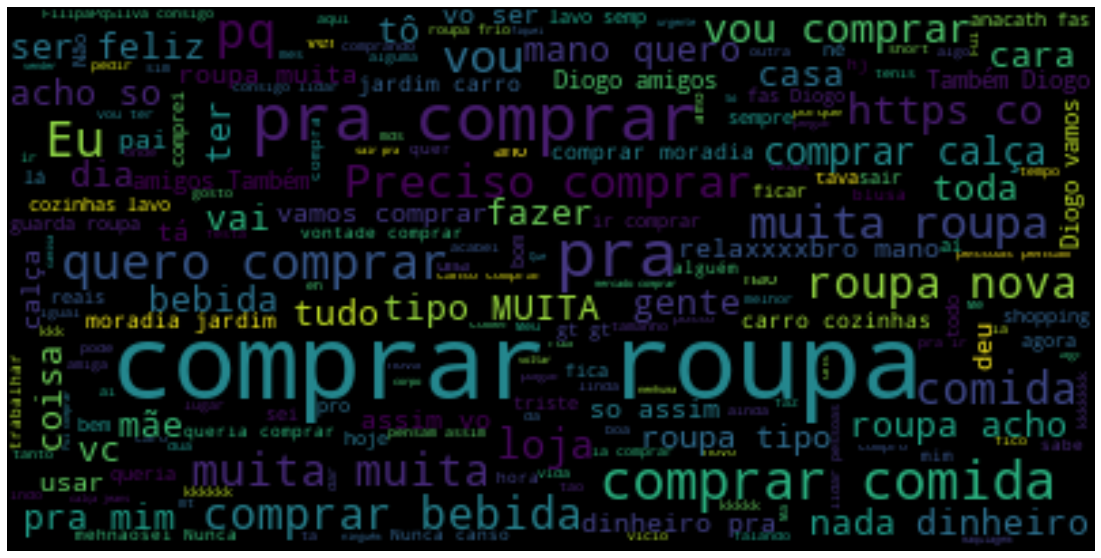

In [175]:
# Generate a word cloud image
wordcloud = WordCloud().generate(string_words)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Modelagem / Estudos

In [ ]:
a = 3

# Validação dos resultados

In [ ]:
a = 1